In [129]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as mp

warnings.filterwarnings("ignore")
mp.rcParams['font.family'] = ['sans-serif']
mp.rcParams['font.sans-serif'] = ['SimHei']
mp.rcParams['axes.unicode_minus']=False

funds = pd.read_csv('funds_details.csv',sep=',',na_values='')
df_funds = pd.DataFrame(funds)
df_funds.iloc[57:65,:]

,fname,fnum,cumulative_nv,cnv_change_6m,unit_nv,unit_nv_change,pnv_change_1m,npv_thisy,class,risk,founded_date,scale,management,manager,fee,mmin_amount,rank_1y
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.19%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100元起购,3223 | 3302
58,招商和悦稳健养老(FOF)A,006861,12.10%,9.17%,1.1210,-0.49%,3.05%,5.59%,混合-FOF,中高风险,2019-04-26,5.21亿元（2019-12-31）,招商基金,章鸽武,0.12%,100元起购,1504 | 3296
59,招商和悦稳健养老(FOF)C,006862,11.63%,8.90%,1.1163,-0.48%,3.01%,5.50%,混合-FOF,中高风险,2019-04-26,3.59亿元（2019-12-31）,招商基金,章鸽武,0.00%,100元起购,1518 | 3296
60,景顺稳健养老目标三年混合(FOF),007272,4.01%,--,1.0400,-0.74%,2.24%,2.73%,混合-FOF,中高风险,2019-09-26,0.75亿元（2019-12-31）,景顺长城基金,薛显志,0.12%,100元起购,2060 | 3296
61,银华尊尚稳健养老混合(FOF),007310,6.79%,6.78%,1.0680,-0.92%,3.18%,3.84%,混合-FOF,中高风险,2019-08-14,0.11亿元（2019-12-31）,银华基金,肖侃宁,0.08%,100元起购,1811 | 3296
62,汇添富养老2040五年持有混合(FOF),007059,18.50%,12.66%,1.1850,-3.19%,5.15%,5.39%,混合-FOF,中高风险,2019-04-29,5.38亿元（2019-12-31）,汇添富基金,蔡健林,0.15%,100元起购,1539 | 3296
63,广发中债7-10年国开债指数A,003376,12.60%,4.11%,1.1261,0.22%,1.85%,2.99%,债券指数,中低风险,2016-09-26,13.73亿元（2019-12-31）,广发基金,王予柯,0.05%,100元起购,293 | 1608
64,广发中债7-10年国开债指数C,003377,11.08%,3.90%,1.1109,0.22%,1.82%,2.94%,债券指数,中低风险,2016-09-26,4.93亿元（2019-12-31）,广发基金,王予柯,0.00%,100元起购,345 | 1608


In [130]:
for item in df_funds.columns:
    df_funds[item]=df_funds[item].apply(lambda x: np.NaN if str(x)=='' else x)

In [131]:
df_funds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 17 columns):
fname             1013 non-null object
fnum              1013 non-null object
cumulative_nv     1013 non-null object
cnv_change_6m     1013 non-null object
unit_nv           1013 non-null float64
unit_nv_change    1013 non-null object
pnv_change_1m     1013 non-null object
npv_thisy         1050 non-null object
class             1013 non-null object
risk              1013 non-null object
founded_date      1013 non-null object
scale             1013 non-null object
management        1013 non-null object
manager           1013 non-null object
fee               1013 non-null object
mmin_amount       1050 non-null object
rank_1y           1050 non-null object
dtypes: float64(1), object(16)
memory usage: 139.6+ KB


In [132]:
df_funds = df_funds.dropna(how='any',axis=0)
df_funds.isnull().sum().sort_values(ascending=False)

rank_1y           0
npv_thisy         0
fnum              0
cumulative_nv     0
cnv_change_6m     0
unit_nv           0
unit_nv_change    0
pnv_change_1m     0
class             0
mmin_amount       0
risk              0
founded_date      0
scale             0
management        0
manager           0
fee               0
fname             0
dtype: int64

In [133]:
strange_place_list = []
for item in df_funds.columns:
    strange_place_list.append(df_funds[df_funds[item]=='--']['fnum'].count())
print(strange_place_list)

[0, 0, 0, 100, 0, 8, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [134]:
strange_index_list = []
unique_strange_set = set()
for item in ['cnv_change_6m','unit_nv_change','npv_thisy']:
    strange_index_list.append(df_funds[df_funds[item]=='--'].index.tolist())
for item in strange_index_list:
    for num in item:
        unique_strange_set.add(num)
unique_strange = list(unique_strange_set)
print(len(unique_strange))
for item in unique_strange:
    df_funds = df_funds.drop(item)

106


In [135]:
strange_place_list = []
for item in df_funds.columns:
    strange_place_list.append(df_funds[df_funds[item]=='--']['fnum'].count())
print(strange_place_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [136]:
df_funds.reset_index(drop=True, inplace=True)
df_funds.head(10)

,fname,fnum,cumulative_nv,cnv_change_6m,unit_nv,unit_nv_change,pnv_change_1m,npv_thisy,class,risk,founded_date,scale,management,manager,fee,mmin_amount,rank_1y
0,广发中证全指建筑材料指数A,004856,12.52%,21.21%,1.1252,-1.99%,6.45%,0.10%,股票指数,高风险,2017-08-02,0.31亿元（2019-12-31）,广发基金,罗国庆,0.10%,100元起购,338 | 1117
1,广发中证全指建筑材料指数C,004857,13.25%,21.17%,1.1325,-2.00%,6.44%,0.07%,股票指数,高风险,2017-08-02,0.77亿元（2019-12-31）,广发基金,罗国庆,0.00%,100元起购,333 | 1117
2,诺安全球黄金,320013,11.58%,4.88%,1.0310,0.59%,6.84%,8.53%,QDII,高风险,2011-01-13,4.77亿元（2019-12-31）,诺安基金,宋青,0.08%,100元起购,13 | 270
3,汇添富黄金及贵金属,164701,-22.80%,4.32%,0.7720,0.52%,6.34%,7.97%,QDII,高风险,2011-08-31,1.48亿元（2019-12-31）,汇添富基金,赖中立,0.08%,100元起购,15 | 270
4,万家平衡养老目标三年(FOF),007232,10.75%,8.58%,1.1075,-0.94%,1.98%,2.54%,混合-FOF,中高风险,2019-04-22,0.11亿元（2019-12-31）,万家基金,徐朝贞,0.12%,100元起购,2102 | 3296
5,嘉实黄金,160719,-9.30%,4.49%,0.9070,0.55%,6.71%,8.36%,QDII,高风险,2011-08-04,1.51亿元（2019-12-31）,嘉实基金,陈正宪,0.08%,100元起购,14 | 270
6,工银前沿医疗股票,001717,134.50%,36.73%,2.3450,-1.14%,12.15%,22.26%,股票型,高风险,2016-02-03,11.40亿元（2019-12-31）,工银瑞信基金,赵蓓,0.15%,100元起购,34 | 1426
7,华润元大双鑫债券A,003680,9.26%,12.68%,1.0927,0.16%,2.77%,3.36%,债券型,中风险,2017-03-24,0.10亿元（2019-12-31）,华润元大基金,刘宏毅,0.08%,100元起购,154 | 2105
8,华润元大双鑫债券C,003723,8.46%,12.47%,1.0847,0.16%,2.73%,3.29%,债券型,中风险,2017-03-24,0.01亿元（2019-12-31）,华润元大基金,刘宏毅,0.00%,100元起购,163 | 2105
9,华润元大稳健债券A,001212,7.19%,0.68%,1.0440,0.77%,1.36%,2.86%,债券型,中低风险,2015-10-16,0.02亿元（2019-12-31）,华润元大基金,李仆,0.08%,100元起购,197 | 2105


In [137]:
for item in ['cumulative_nv','cnv_change_6m','unit_nv_change','pnv_change_1m','npv_thisy','fee']:
    df_funds[item] = df_funds[item].str.replace('%','')
    df_funds[item] = df_funds[item].astype('float')
    df_funds[item] = df_funds[item].apply(lambda x : x/100)
df_funds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 17 columns):
fname             907 non-null object
fnum              907 non-null object
cumulative_nv     907 non-null float64
cnv_change_6m     907 non-null float64
unit_nv           907 non-null float64
unit_nv_change    907 non-null float64
pnv_change_1m     907 non-null float64
npv_thisy         907 non-null float64
class             907 non-null object
risk              907 non-null object
founded_date      907 non-null object
scale             907 non-null object
management        907 non-null object
manager           907 non-null object
fee               907 non-null float64
mmin_amount       907 non-null object
rank_1y           907 non-null object
dtypes: float64(7), object(10)
memory usage: 120.6+ KB


IndexError: index 2 is out of bounds for axis 1 with size 2

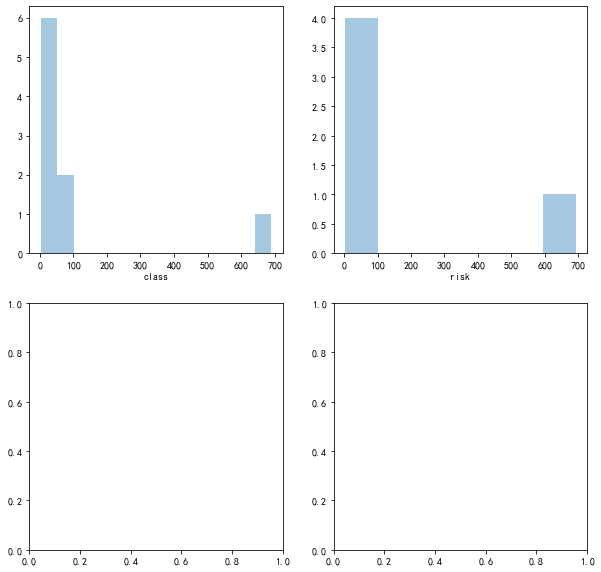

In [149]:
# for item in ['class','risk','management','manager']:
#     print(df_funds[item].value_counts(ascending=False))
fig,axes = mp.subplots(nrows=2,ncols=2,figsize=(10,10))
c = 0
r = 0
for item in ['class','risk','management','manager']:
    if r == 0 :
        sns.distplot(df_funds[item].value_counts(ascending=False),ax=axes[r,c],norm_hist=False,kde=False)
        c += 1
    else:
        r += 1
        c = 0
        sns.distplot(df_funds[item].value_counts(ascending=False),ax=axes[r,c],norm_hist=False,kde=False)
        c += 1

In [ ]:
mp.figure(figsize=(16,8))
ax = sns.barplot(x=df_funds['management'].value_counts().index.tolist()[:15],y=df_funds['management'].value_counts().tolist()[:15])
mp.xticks(fontsize=12,rotation=45)
mp.yticks(fontsize=12)